tf.keras are highlevel API that can be used to train NN, some lower level API like python API can help in more customization and deeper view of the NN model training 

#### Quick Summary of Tensorflow

- similar to numpy, with GPU support
- supports distributed computing
- includes just-in-time compiler, allowing to optimize computations for speed and memory usage. works by extracting the computation graph from a python function and them optimizeing it and running efficiently
- computation graphs can be exported to a portable format so we can train models in one environment and run in another
- implements autodiff and provides excellent optimizers

some main features

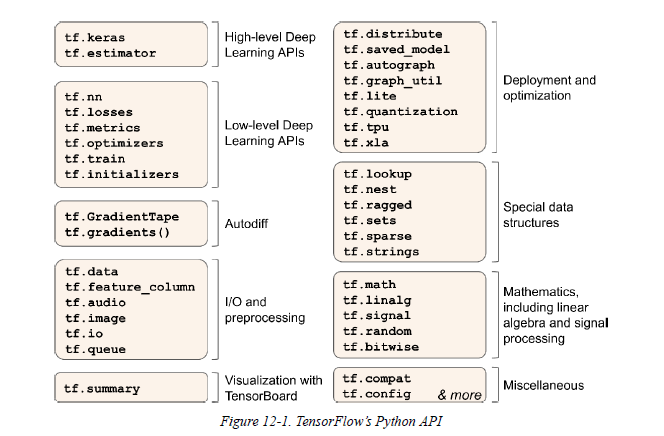

at the lowest level, it's highly efficient C++ code. Many operations have multiple implementations called kernels, each kernel is dedicated to a specific device type such as CPU, GPU or TPU. 

tensorflow is at the center of an extensice ecosystem of libraries. 
- tensorboard - visaulizaitions
- extended - for productionizing


### __Using Tensorflow like NumPy__

tensorflow API revolves around tensors, which flow from operation to operation. 

__Tensors and Operations__

create a tensor using tf.constant()

In [1]:
import tensorflow as tf
import numpy as np

In [3]:
tf.constant([[1.,2.,3.],[4.,5.,6.]]) #matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [5]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]])

In [6]:
t.shape

TensorShape([2, 3])

In [7]:
t.dtype

tf.float32

In [8]:
t.numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>>

In [9]:
##Indexing like numpy
t[:,1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [10]:
##operations
t+10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [11]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [12]:
tf.transpose(t)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [13]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

- \+ is equivalent to tf.add()
- @ is equivalent to tf.matmul()

Most funcations are same as numpy, in trasnpose, tensorflow creates a new tensor

__Keras low level API__

kera's own low level API is keras.backend, it includes fucntions like square, exp, sqrt. 

In [14]:
from tensorflow import keras

K = keras.backend

In [15]:
K.square(K.transpose(t))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1., 16.],
       [ 4., 25.],
       [ 9., 36.]], dtype=float32)>

__Tensors and numpy__

we can create a tensor from a NumPy array, and vice versa. we can even apply TensorFlow operations to NumPy arrays and NumPy operations to tensors

In [23]:
a = np.array([2.,4.,5.])

In [24]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [25]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [26]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [27]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So when you create a tensor from a NumPy array, make sure to set dtype=tf.float32.

__Type Conversions__

Type conversions can significantly hurt performance, and they can easily go
unnoticed when they are done automatically. To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types

In [28]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

In [29]:
tf.constant(2.0) + tf.cast(tf.constant(40), tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

__Variables__


The tf.Tensor values we’ve seen so far are immutable: you cannot modify
them.

In [30]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])

In [31]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [32]:
##reassignment can be done using assign() or assign_add, assign_sub method
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [33]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [34]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [35]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [36]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   6.],
       [  8.,  10., 200.]], dtype=float32)>

__Other Data Structures__

TensorFlow supports several other data structures, including the following:

1. Sparse tensors
2. tensor arrays - list of tensors. They have a fixed size by default but can optionally be made dynamic.
3. ragged tensors - Represent static lists of lists of tensors
4. string tensors - Are regular tensors of type tf.string
5. sets - Are represented as regular tensors (or sparse tensors)
6. queues  Store tensors across multiple steps. TensorFlow offers various kinds of queues: simple First In, First Out (FIFO) queues (FIFOQueue), queues that can prioritize some items (PriorityQueue), shuffle their items (RandomShuffleQueue), and batch items of different shapes by padding (PaddingFIFOQueue)

### Customizing Models and Training Algorithms

__Custom Loss Functions__

